In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Dense
from keras import models


In [3]:
file='/scratch/by8jj/window_function/labelled_08_10.log'

In [24]:
f=open(file,'r')

line=f.readline().strip()
uid=[]
duration=[]
orig_bytes=[]
resp_bytes=[]
conn_state=[]
orig_pkts=[]
resp_pkts=[]
local=[]
label=[]

flag=0
counter=0

while counter<=1000000 and line:
    temp=line.split('\t')
    
    if temp[6]=="-": 
        line=f.readline().strip()
        continue
    
    
    if temp[15]=='0'and flag!=0:
        flag-=1
        line=f.readline().strip()
        continue
    
    
        
    #uid.append(temp[1])
    duration.append(np.log(float(temp[6])+0.001))
    orig_bytes.append(np.log(float(temp[7])+0.001))
    resp_bytes.append(np.log(float(temp[8])+0.001))
    #conn_state.append(temp[9])
    orig_pkts.append(np.log(float(temp[11])+0.001))
    resp_pkts.append(np.log(float(temp[12])+0.001))
    local.append(int(temp[14]))
    label.append(int(temp[15]))
    
    flag+=np.random.randint(low=30, high=60)
        
    counter+=1
    line=f.readline().strip()
                 
f.close()

(array([  2.55989000e+05,   6.06220000e+04,   9.67240000e+04,
          9.93460000e+04,   3.44995000e+05,   1.23722000e+05,
          1.73510000e+04,   1.13000000e+03,   1.15000000e+02,
          7.00000000e+00]),
 array([ -6.90675578,  -4.96315803,  -3.01956028,  -1.07596253,
          0.86763522,   2.81123297,   4.75483073,   6.69842848,
          8.64202623,  10.58562398,  12.52922173]),
 <a list of 10 Patch objects>)

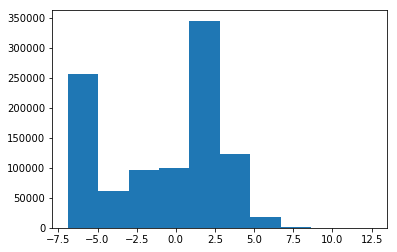

In [25]:
plt.hist(duration)

(array([  2.41135000e+05,   0.00000000e+00,   3.90380000e+04,
          2.92028000e+05,   1.75910000e+05,   2.40899000e+05,
          1.04910000e+04,   2.75000000e+02,   2.13000000e+02,
          1.20000000e+01]),
 array([ -6.90775528,  -4.08453312,  -1.26131096,   1.56191119,
          4.38513335,   7.20835551,  10.03157767,  12.85479983,
         15.67802198,  18.50124414,  21.3244663 ]),
 <a list of 10 Patch objects>)

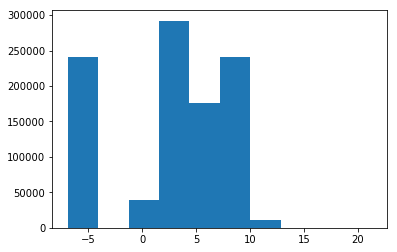

In [26]:
plt.hist(orig_bytes)

In [11]:
X=np.matrix([duration,orig_bytes,resp_bytes, orig_pkts, resp_pkts, local]).T.astype(np.float)
y=label

In [27]:
label.count(1)

370158

In [28]:
label.count(0)

629843

In [46]:
file='/scratch/by8jj/window_function/labelled_08_11.log'

In [69]:
#test dataset
f=open(file,'r')

line=f.readline().strip()
uid=[]
duration=[]
orig_bytes=[]
resp_bytes=[]
conn_state=[]
orig_pkts=[]
resp_pkts=[]
local=[]
label=[]

counter=0

while counter<=1000000 and line:
    temp=line.split('\t')
    
    if temp[6]=="-": 
        line=f.readline().strip()
        continue
    
        
    #uid.append(temp[1])
    duration.append(np.log(float(temp[6])+0.001))
    orig_bytes.append(np.log(float(temp[7])+0.001))
    resp_bytes.append(np.log(float(temp[8])+0.001))
    conn_state.append(temp[9])
    orig_pkts.append(np.log(float(temp[11])+0.001))
    resp_pkts.append(np.log(float(temp[12])+0.001))
    local.append(int(temp[14]))
    label.append(int(temp[15]))
    
    counter+=1
    line=f.readline().strip()
                 
f.close()


In [70]:
conn_state

['OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',
 'OTH',


In [48]:
test_x=np.matrix([duration,orig_bytes,resp_bytes, orig_pkts, resp_pkts, local]).T.astype(np.float)
test_y=label

In [49]:
label.count(1)

96

In [50]:
label.count(0)

999905

In [51]:
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial').fit(X, y)
pred_y=LR.predict(test_x)

In [52]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y,pred_y)

In [53]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [54]:
test_y.count(1)

96

Confusion matrix, without normalization
[[721134 278771]
 [     3     93]]


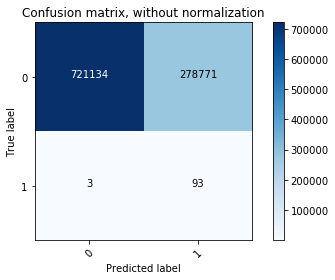

In [56]:
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [58]:
tn, fp, fn, tp = cm.ravel()

In [62]:
precision=tp/(tp+fp)

In [63]:
recall=tp/(tp+fn)

In [65]:
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)

In [66]:
(precision, recall, fpr, accuracy)

(0.00033349589764186129, 0.96875, 0.27879748576114732, 0.72122627877372125)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(label),label)

In [ ]:
class_weights

In [ ]:
model = models.Sequential()
model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
result = model.fit(X, label, nb_epoch=20, batch_size=32,  verbose=1) #class_weight = class_weights)

In [68]:
X

matrix([[ -6.57557797e+00,   2.07956653e+00,   2.07956653e+00,
           9.99500333e-04,   9.99500333e-04,   0.00000000e+00],
        [ -6.24095207e+00,   2.07956653e+00,   2.07956653e+00,
           9.99500333e-04,   9.99500333e-04,   0.00000000e+00],
        [ -6.59880107e+00,   3.95126295e+00,   3.95126295e+00,
           9.99500333e-04,   9.99500333e-04,   0.00000000e+00],
        ..., 
        [  1.66089594e+00,   3.66358729e+00,   7.30787345e+00,
           1.94605300e+00,   2.07956653e+00,   0.00000000e+00],
        [  2.34162339e+00,   3.66358729e+00,   7.17088925e+00,
           1.94605300e+00,   2.19733568e+00,   0.00000000e+00],
        [  1.66050225e+00,   3.66358729e+00,   7.30787345e+00,
           2.07956653e+00,   2.19733568e+00,   0.00000000e+00]])